<a href="https://colab.research.google.com/github/sahithi0306/Deep-Vision/blob/main/DeepVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your noisy image:


Saving sample-img.jpg to sample-img.jpg
Uploaded: sample-img.jpg
Image loaded successfully.
Denoising completed.
Contrast enhancement completed.
Sharpening completed.


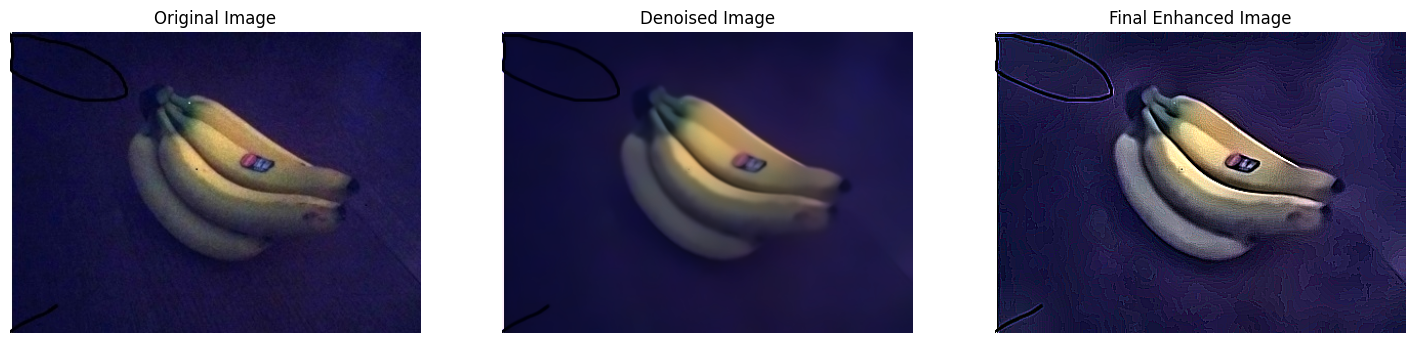

In [2]:

# IMAGE DENOISING & ENHANCEMENT
import cv2
import numpy as np
import matplotlib.pyplot as plt

try:
    from google.colab import files
    COLAB = True
except:
    COLAB = False

# 1. IMAGE UPLOAD MODULE

def upload_image():
    if COLAB:
        print("Please upload your noisy image:")
        uploaded = files.upload()
        if uploaded:
            image_path = next(iter(uploaded))
            print(f"Uploaded: {image_path}")
            return image_path
        else:
            print("No image uploaded.")
            return None
    else:
        return input("Enter image path: ")

# 2. IMAGE LOADING MODULE

def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found or cannot be loaded.")
        return None
    print("Image loaded successfully.")
    return image

# 3. DENOISING MODULE

def denoise_image(image, h=15, hColor=15, templateWindowSize=7, searchWindowSize=21):
    denoised = cv2.fastNlMeansDenoisingColored(
        image, None, h, hColor, templateWindowSize, searchWindowSize
    )
    print("Denoising completed.")
    return denoised

# 4. CONTRAST ENHANCEMENT MODULE (CLAHE)

def enhance_contrast(image, clipLimit=2.0, tileGridSize=(8, 8)):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    cl = clahe.apply(l)

    merged = cv2.merge((cl, a, b))
    enhanced = cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

    print("Contrast enhancement completed.")
    return enhanced

# 5. SHARPENING MODULE

def sharpen_image(image):
    kernel = np.array([
        [-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1]
    ])
    sharpened = cv2.filter2D(image, -1, kernel)
    print("Sharpening completed.")
    return sharpened

# 6. DISPLAY MODULE

def display_images(original, denoised, final):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB))
    plt.title("Denoised Image")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
    plt.title("Final Enhanced Image")
    plt.axis("off")

    plt.show()

# 7. MAIN PROCESSING FUNCTION

def process_image(image_path, apply_sharpen=True):
    original = load_image(image_path)
    if original is None:
        return

    denoised = denoise_image(original)
    enhanced = enhance_contrast(denoised)

    if apply_sharpen:
        final = sharpen_image(enhanced)
    else:
        final = enhanced

    display_images(original, denoised, final)

# 8. PROGRAM EXECUTION

if __name__ == "__main__":
    img_path = upload_image()
    if img_path:
        process_image(img_path, apply_sharpen=True)
